## Easy Evaluation of CSV Dataset Predictability

- Need to evaluate the predictability of a feature from a dataset?
- Don't have time to invest in sorting the attributes in the table?
- Not sure which attributes are numerical and which ones discrete?
- Are there missing cells?
- What are the important features? 

Now there is an easy solution.

## How easy?

As easy as the following:

> **\> python usap_csv_eval.py credit-approval.csv**


## And what it gets?

The following output:


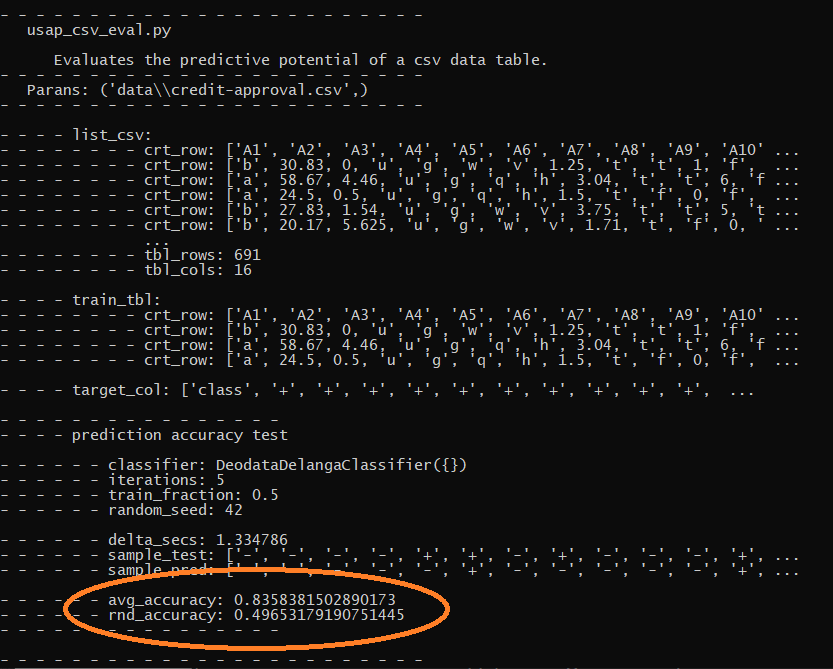




The data of interest is the average prediction accuracy. This can be compared with the accuracy of a classifier that randomly picks an output.
In the above example, the predicted feature is the verdict on credit approval based on the other attributes of the csv file.

But how does it know which one is the target column that needs to be predicted?

It doesn't; just assumes it is the last column if a column index has not been provided. For many datasets it happens that the last column is the one that needs to be predicted. If that is not the case, it can be specified as a parameter:

> **\> python usap_csv_eval.py data/credit-approval.csv -1**

or

> **\> python usap_csv_eval.py data/credit-approval.csv 15**

The -1 value indicates the last column. In this particular case it corresponds to index 15. Note that the first column starts at 0.

Other configurable parameters are: the number of iterations for computing the average and the random seed used in these computations.
Other customization can be done by editing the code.

      Usage:

        python usap_csv_eval.py <path-or-url> [<targ-idx> [<iter-no>
                                 [<rnd-seed> [<aux-param>]]]]

          <path-or-url>
            specifies either the file path or the url to
            the csv dataset

          <targ-idx>
            specifies the target column index
            starting with zero. If omitted, the last column
            is used as target

          <iter-no>
            specifies the number of predict iterations

          <rnd-seed>
            random seed for prediction test

          <aux-param>
            a string containing additional parameters
            specified as a dict structure:
                  "{'id-key1': 'id-value1', ...}"

              'exc': {<idx_0>, <idx_1>, ...}
                 excluded columns - specifies a set
                 of column indexes to be excluded
                 from the dataset

      Usage example:
        python usap_csv_eval.py data.csv -1 10 42 "{'exc': {2, 3}}"
    
The module takes the table dataset and randomly splits it into two equal parts: training and test. A robust mixed attribute classifier is trained on one half of the data and makes predictions using the other half.
The classifier in question is "deodel"; more information available at:

https://github.com/c4pub/deodel

## What is needed to run it?

Two python modules are needed: deodel.py and usap_csv_eval.py.
And also a csv dataset, either a local file or a URL reference to an online one.

The following code snippet provides a use example.

In [1]:
"""
    Example of csv dataset evaluation
"""

# >- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("*** Execution start")
print()
import urllib
import shutil
try:
  import validators
except:
  !pip install validators
  import validators

# >- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("*** Get remote files")

remote_list = [
                {'file': 'deodel.py', 'url': "https://raw.githubusercontent.com/c4pub/deodel/main/deodel.py"},
                {'file': 'usap_csv_eval.py', 'url': "https://raw.githubusercontent.com/c4pub/deodel/main/usap_csv_eval.py"},
            ]

for remote_entry in remote_list :
    file_name = remote_entry['file']
    url = remote_entry['url']
    with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)

# >- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("*** Run locally")

import usap_csv_eval

# ret_info = usap_csv_eval.CvsProcProxy("xyz")

in_data = "https://raw.githubusercontent.com/c4pub/misc/main/data/credit-approval.csv"

ret_info = usap_csv_eval.CvsProcProxy(in_data)

print()
print("    ret_info:", ret_info)
print()

    
# >- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("*** Execution stop")



*** Execution start

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=29c7652cc8e4d9828c3748a895c72a4e5620c2b4ad6fd51d4b857dad22cd6a12
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
*** Get remote files
*** Run locally

- - - - list_csv:
- - - - - - - - crt_row: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10' ...
- - - - - - - - crt_row: ['b', 30.83, 0, 'u', 'g', 'w', 'v', 1.25, 't', 't', 1, 'f',  ...
- - - - - - - - crt_row: ['a', 58.67, 4.46, 'u', 'g', 'q', 'h', 3.04, 't', 't', 6, 'f ...
- - - - - - - - crt_row: ['a', 24.5, 0.5, 'u', 'g', 'q', 'h', 1.5, 't', 'f', 0, 'f',  ...
- - - - - - - - crt_row: ['b', 27.83, 1.54, 'u', 'g', 'w', 'v', 3.75, 't', 't', 5, 't ...
- - - - - - - - crt_row: ['b', 20.17,


## Evaluating the importance of features

An auxiliary parameter can be used to experiment with the effect of attributes on the prediction accuracy. The 'exc' parameter can be used to exclude a set of attributes (columns) of the dataset from the evaluation.
In the following example the list of parameters for the command line are supplemented with:

- target column: -1, meaning last
- number of iteration: 5
- random seed: 42
- excluded column list: {'exc': \[2, 3\]}


In [2]:
# >- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("*** Execution start")

import usap_csv_eval

# ret_info = usap_csv_eval.CvsProcProxy("xyz")

in_data = "https://raw.githubusercontent.com/c4pub/misc/main/data/credit-approval.csv"

param_list = [in_data, -1, 5, 42, {'exc':[2, 3]}]

print()
print("    param_list:", param_list)
print()

ret_info = usap_csv_eval.CvsProcProxy(*param_list)

print()
print("    ret_info:", ret_info)
print()

    
# >- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print("*** Execution stop")

*** Execution start

    param_list: ['https://raw.githubusercontent.com/c4pub/misc/main/data/credit-approval.csv', -1, 5, 42, {'exc': [2, 3]}]


- - - - list_csv:
- - - - - - - - crt_row: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10' ...
- - - - - - - - crt_row: ['b', 30.83, 0, 'u', 'g', 'w', 'v', 1.25, 't', 't', 1, 'f',  ...
- - - - - - - - crt_row: ['a', 58.67, 4.46, 'u', 'g', 'q', 'h', 3.04, 't', 't', 6, 'f ...
- - - - - - - - crt_row: ['a', 24.5, 0.5, 'u', 'g', 'q', 'h', 1.5, 't', 'f', 0, 'f',  ...
- - - - - - - - crt_row: ['b', 27.83, 1.54, 'u', 'g', 'w', 'v', 3.75, 't', 't', 5, 't ...
- - - - - - - - crt_row: ['b', 20.17, 5.625, 'u', 'g', 'w', 'v', 1.71, 't', 'f', 0, ' ...
                ...
- - - - - - - - tbl_rows: 691
- - - - - - - - tbl_cols: 16

- - - - train_tbl:
- - - - - - - - crt_row: ['A1', 'A2', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A1 ...
- - - - - - - - crt_row: ['b', 30.83, 'g', 'w', 'v', 1.25, 't', 't', 1, 'f', 'g', 202 ...
- - - - - - - - c

In the above example, columns at offset 2 and 3 are excluded from the evaluation. It can be seen that the prediction accuracy slightly improves, suggesting that they are not important for prediction.